In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## INDENG 242 Final Project

## YELP BUSINESS CLOSURE PREDICTION

## Group Members:
Shravani Nimbolkar

Serah Varghese

Aakash Sundaresan

Ankit Bhawsar

Frank Lin

## Import Dataset



In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
yelp = pd.read_json("yelp_academic_dataset_business.json", lines=True)
#yelp = pd.read_json("/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json", lines=True)

In [ ]:
yelp.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."


In [ ]:
yelp['is_open'].value_counts()

1    119698
0     30648
Name: is_open, dtype: int64

In [ ]:
yelp.shape

150346

In [ ]:
baseline = yelp['is_open'].value_counts()[1]/yelp.shape[0]
print("baseline accuracy : ", baseline )

baseline accuracy :  0.7961502135075094


In [ ]:
yelp.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

### Geolocation features

1. Kmeans on longitude and latitude
2. Assign labels of the clusters

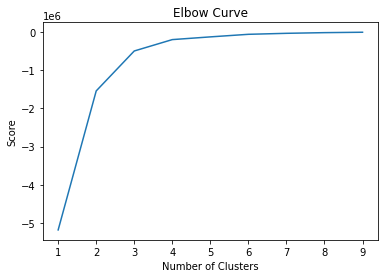

In [ ]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = yelp[['latitude']]
X_axis = yelp[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(yelp[yelp.columns[6:8]]) # Compute k-means clustering.
yelp['cluster_label'] = kmeans.fit_predict(yelp[yelp.columns[6:8]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(yelp[yelp.columns[6:8]]) # Labels of each point
yelp.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cluster_label
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,1
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",1
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",2
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",2


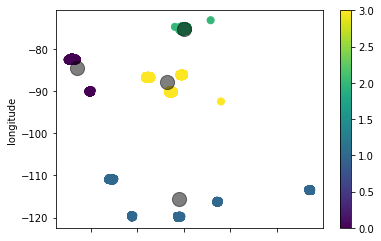

In [ ]:
yelp.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# EDA

## Count of open or closed restaurants across different states

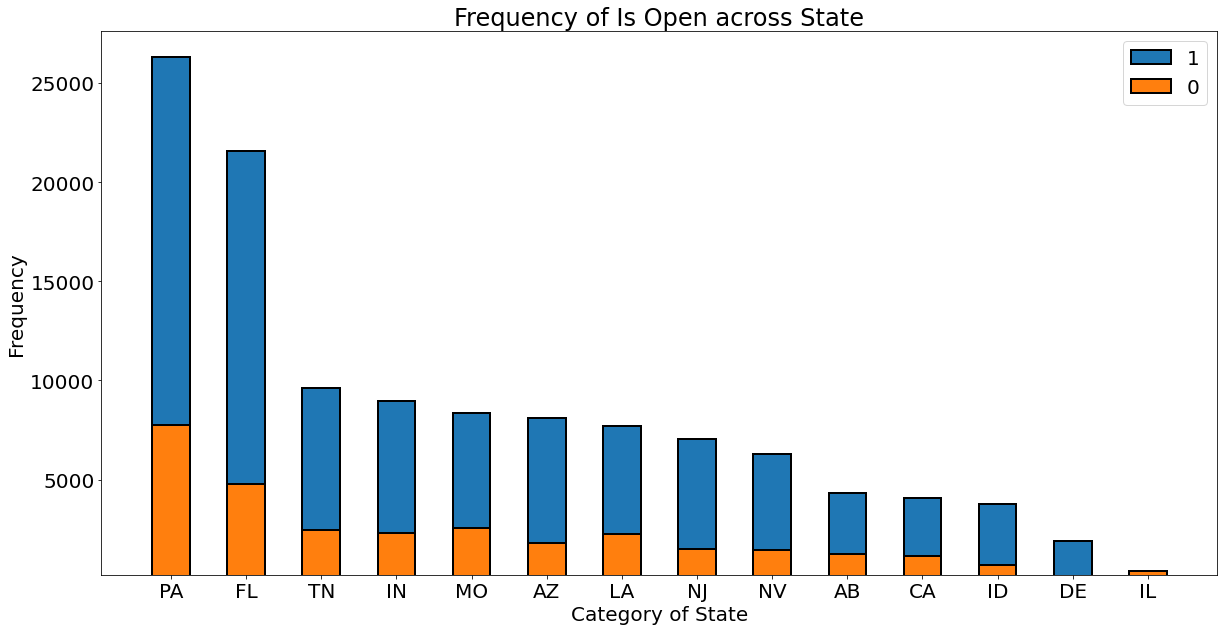

In [ ]:
import numpy as np
def bar_stack_plot(item_cat1, item_cat2, df):
    """
    This function plot a stacked bar plot with two given categorical variables among
            ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
        df: dataframe
    """
    plt.rcParams.update({'font.size': 20})
    
    title1 = " ".join([x.capitalize() for x in item_cat1.split("_")])
    title2 = " ".join([x.capitalize() for x in item_cat2.split("_")])
    
    labels = list(dict(df[item_cat2].value_counts()).keys())
    data_list = []
    lbs_list = []
    for label in labels:
        temp_counts = pd.Series(df[df[item_cat2] ==label][item_cat1]).value_counts()
        values = dict(temp_counts).values()
        lbs = dict(temp_counts).keys()
        data_list.append(tuple(values))
        lbs_list.append(tuple(lbs))
        
    fig, ax = plt.subplots(figsize=(20, 10))
    

    data_list[0] = data_list[0][:13]    #only the top 13 states show up on the graph
    data_list[1] = data_list[1][:13]
    lbs_list[0] = lbs_list[0][:13]
    lbs_list[1] = lbs_list[1][:13]
    
    # print(labels)
    # print(data_list)
    # print(lbs_list)

    width=0.5
    for label, data, lbs in zip(labels, data_list, lbs_list):
        N = len(data)
        ind = np.arange(N)   # the x locations for the groups
        p = ax.bar(lbs, data, width, label=label, linewidth=2, edgecolor='black')
        plt.ylim(ymin=200)
        ax.axhline(0, color='grey', linewidth=0.8)
        ax.set_ylabel("Frequency")
        ax.set_xlabel(f"Category of {title1}")
        ax.set_title(f'Frequency of {title2} across {title1}')
        ax.legend()

bar_stack_plot("state", "is_open", yelp)

## Star rating vs Review count

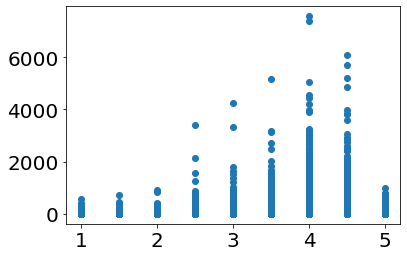

In [ ]:
plt.scatter(yelp['stars'],yelp['review_count'])

## Count of businesses that are opened or closed based on star rating

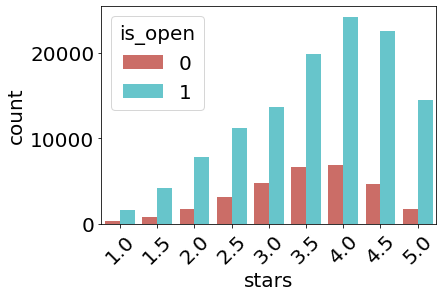

In [ ]:
sns.countplot(x='stars', data=yelp, palette='hls', hue='is_open')
sns.set(rc={'figure.figsize':(10,10)},font_scale = 2)
plt.xticks(rotation=45)
plt.show()

## Unique business categories and their counts

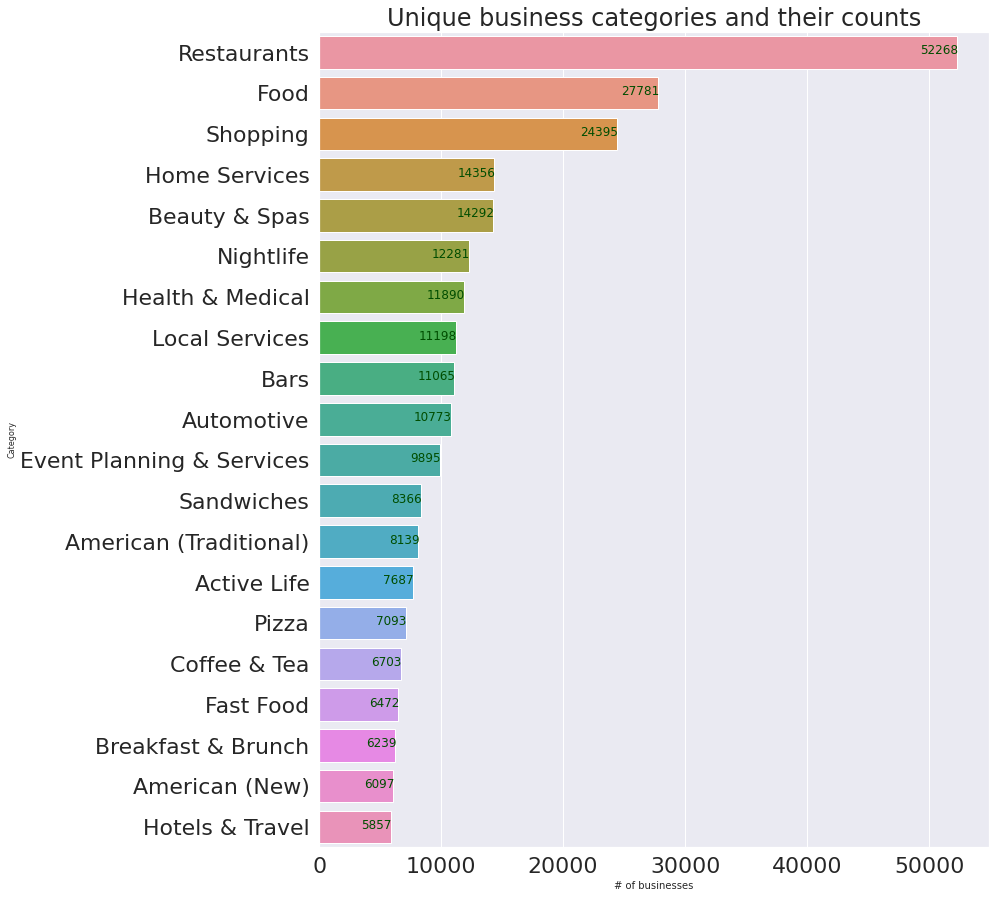

In [ ]:
from matplotlib.offsetbox import FontProperties
business_cats=', '.join(yelp['categories'].dropna())
cats=pd.DataFrame(business_cats.split(', '),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

plt.figure(figsize=(12,15))
ax = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
# sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})   
ax.set_ylabel('Category', size=8)
ax.set_xlabel('# of businesses', size=10)
ax.set_title('Unique business categories and their counts')


for p in ax.patches:
    ax.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(1, -18),
                fontsize=12,
                color='#004d00',
                textcoords='offset points',
                horizontalalignment='right')   
plt.show()    

## Top 10 states with highest number of businesses

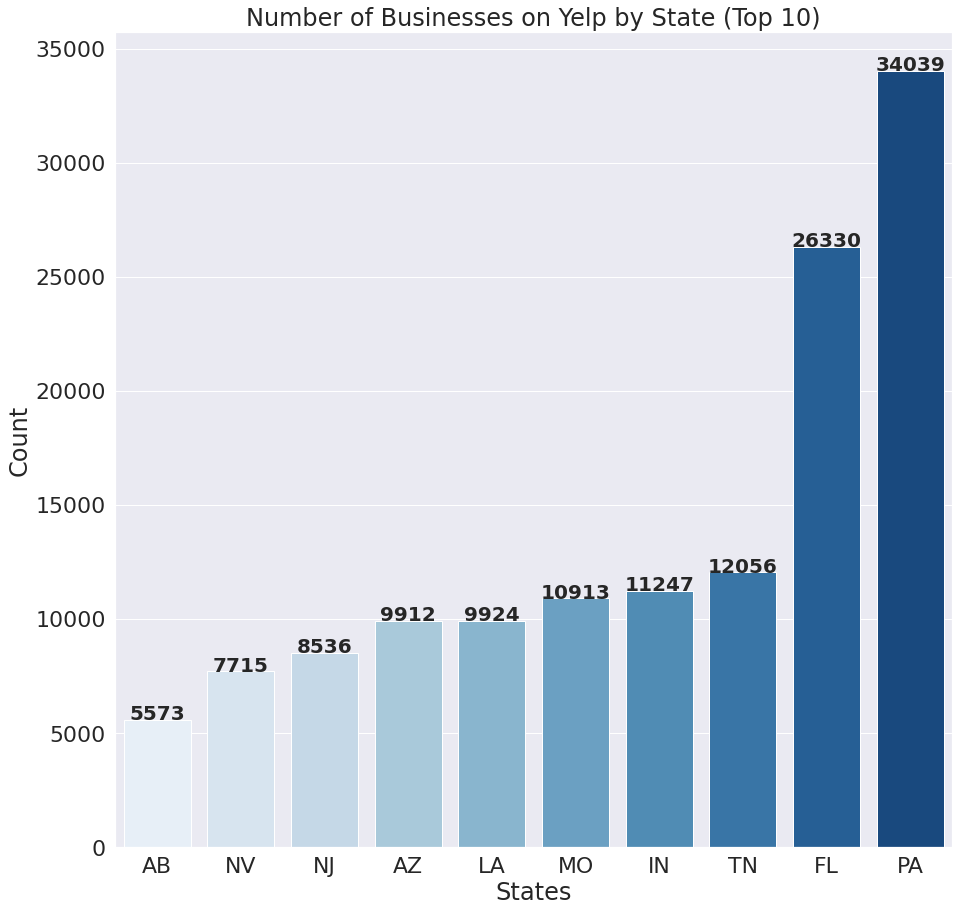

In [ ]:
top10 = yelp['state'].value_counts(ascending=True).tail(10).to_frame()

plt.figure(figsize=(15,15))
ax = sns.barplot(x=top10.index,y='state', data=top10, palette='Blues')
ax.set_ylabel('Count')
ax.set_xlabel('States')
ax.set_title('Number of Businesses on Yelp by State (Top 10)')

for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width-.4, 
                y+height+2,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
               size='small') 
                
plt.show()

# Preprocessing

## Preprocessing Attributes Column

In [ ]:
yelp["attributes"]

0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'BusinessParking': '{'garage': False, 'street...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object

In [ ]:
atts = []

for dic in yelp["attributes"]:
  if dic:
    for d in dic.keys():
      if d not in atts:
        atts.append(d)

atts

['ByAppointmentOnly',
 'BusinessAcceptsCreditCards',
 'BikeParking',
 'RestaurantsPriceRange2',
 'CoatCheck',
 'RestaurantsTakeOut',
 'RestaurantsDelivery',
 'Caters',
 'WiFi',
 'BusinessParking',
 'WheelchairAccessible',
 'HappyHour',
 'OutdoorSeating',
 'HasTV',
 'RestaurantsReservations',
 'DogsAllowed',
 'Alcohol',
 'GoodForKids',
 'RestaurantsAttire',
 'Ambience',
 'RestaurantsTableService',
 'RestaurantsGoodForGroups',
 'DriveThru',
 'NoiseLevel',
 'GoodForMeal',
 'BusinessAcceptsBitcoin',
 'Smoking',
 'Music',
 'GoodForDancing',
 'AcceptsInsurance',
 'BestNights',
 'BYOB',
 'Corkage',
 'BYOBCorkage',
 'HairSpecializesIn',
 'Open24Hours',
 'RestaurantsCounterService',
 'AgesAllowed',
 'DietaryRestrictions']

In [ ]:
len(atts)

39

In [ ]:
def parse_attributes(document):

  ret = []
  if document:
    for key in document.keys():
      if document[key]:
        ret.append(key)
      
  return ret

In [ ]:
att_column = yelp["attributes"].apply(parse_attributes)

att_column

0                                       [ByAppointmentOnly]
1                              [BusinessAcceptsCreditCards]
2         [BikeParking, BusinessAcceptsCreditCards, Rest...
3         [RestaurantsDelivery, OutdoorSeating, Business...
4         [BusinessAcceptsCreditCards, WheelchairAccessi...
                                ...                        
150341          [ByAppointmentOnly, RestaurantsPriceRange2]
150342    [BusinessAcceptsCreditCards, RestaurantsPriceR...
150343    [RestaurantsPriceRange2, BusinessAcceptsCredit...
150344    [BusinessParking, BikeParking, RestaurantsPric...
150345    [WheelchairAccessible, BusinessAcceptsBitcoin,...
Name: attributes, Length: 150346, dtype: object

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

att_column_detokenized = att_column.apply(TreebankWordDetokenizer().detokenize)

att_column_detokenized

0                                         ByAppointmentOnly
1                                BusinessAcceptsCreditCards
2         BikeParking BusinessAcceptsCreditCards Restaur...
3         RestaurantsDelivery OutdoorSeating BusinessAcc...
4         BusinessAcceptsCreditCards WheelchairAccessibl...
                                ...                        
150341             ByAppointmentOnly RestaurantsPriceRange2
150342    BusinessAcceptsCreditCards RestaurantsPriceRan...
150343    RestaurantsPriceRange2 BusinessAcceptsCreditCards
150344    BusinessParking BikeParking RestaurantsPriceRa...
150345    WheelchairAccessible BusinessAcceptsBitcoin Re...
Name: attributes, Length: 150346, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
att_sparse_dtm = countvec.fit_transform(att_column_detokenized)
att_dtm = pd.DataFrame(att_sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=yelp.index)
att_dtm

,acceptsinsurance,agesallowed,alcohol,ambience,bestnights,bikeparking,businessacceptsbitcoin,businessacceptscreditcards,businessparking,byappointmentonly,...,restaurantscounterservice,restaurantsdelivery,restaurantsgoodforgroups,restaurantspricerange2,restaurantsreservations,restaurantstableservice,restaurantstakeout,smoking,wheelchairaccessible,wifi
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,1,1,...,0,1,0,1,1,0,1,0,1,1
3,0,0,1,0,0,1,0,1,1,1,...,0,1,0,1,0,0,1,0,0,1
4,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
150342,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
150343,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
150344,0,0,0,0,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0


In [ ]:
frequencies = att_dtm.sum().sort_values(ascending=False)
frequencies

businessacceptscreditcards    119765
businessparking                91085
restaurantspricerange2         85314
bikeparking                    72638
restaurantstakeout             59857
wifi                           56914
restaurantsdelivery            56282
goodforkids                    53375
outdoorseating                 48802
restaurantsreservations        45247
hastv                          45084
ambience                       44279
restaurantsgoodforgroups       44170
alcohol                        43189
byappointmentonly              42339
caters                         40127
restaurantsattire              39255
noiselevel                     37993
goodformeal                    29087
wheelchairaccessible           28953
restaurantstableservice        19982
dogsallowed                    18284
businessacceptsbitcoin         17430
happyhour                      15171
drivethru                       7760
music                           7521
acceptsinsurance                5713
b

In [ ]:
countvec = CountVectorizer(min_df=0.05)
att_sparse_dtm = countvec.fit_transform(att_column_detokenized)
att_dtm2 = pd.DataFrame(att_sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=yelp.index)
att_dtm2

,alcohol,ambience,bikeparking,businessacceptsbitcoin,businessacceptscreditcards,businessparking,byappointmentonly,caters,dogsallowed,drivethru,...,outdoorseating,restaurantsattire,restaurantsdelivery,restaurantsgoodforgroups,restaurantspricerange2,restaurantsreservations,restaurantstableservice,restaurantstakeout,wheelchairaccessible,wifi
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,1,1,1,0,...,1,0,1,0,1,1,0,1,1,1
3,1,0,1,0,1,1,1,1,0,0,...,1,0,1,0,1,0,0,1,0,1
4,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
150342,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
150343,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
150344,0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
yelp2 = yelp.drop(columns = ['attributes'])
yelp3 = pd.concat([yelp2, att_dtm2], axis=1, join='inner')
yelp3.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,outdoorseating,restaurantsattire,restaurantsdelivery,restaurantsgoodforgroups,restaurantspricerange2,restaurantsreservations,restaurantstableservice,restaurantstakeout,wheelchairaccessible,wifi
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,0,0,0,0,0,0,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,1,0,1,0,1,1,0,1,1,1
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1,0,1,0,1,0,0,1,0,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
yelp.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'cluster_label'],
      dtype='object')

In [ ]:
yelp3.shape

(150346, 40)

In [ ]:
att_dtm2.shape

(150346, 26)

## Preprocessing Categories Column

In [ ]:
yelp["categories"]

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

In [ ]:
def parse_categories(document):

  ret = []
  if document:
    lis = document.split(",")
    for c in lis:
      c = c.strip()
      c = c.lower()
      c = c.replace(' ','_')
      if c not in ret:
        ret.append(c)

  return ret


In [ ]:
cat_column = yelp["categories"].apply(parse_categories)

cat_column

0         [doctors, traditional_chinese_medicine, naturo...
1         [shipping_centers, local_services, notaries, m...
2         [department_stores, shopping, fashion, home_&_...
3         [restaurants, food, bubble_tea, coffee_&_tea, ...
4                               [brewpubs, breweries, food]
                                ...                        
150341                         [nail_salons, beauty_&_spas]
150342    [pets, nurseries_&_gardening, pet_stores, hobb...
150343    [shopping, jewelry, piercing, toy_stores, beau...
150344    [fitness/exercise_equipment, eyewear_&_opticia...
150345    [beauty_&_spas, permanent_makeup, piercing, ta...
Name: categories, Length: 150346, dtype: object

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
cat_column_detokenized = cat_column.apply(TreebankWordDetokenizer().detokenize)
cat_column_detokenized


0         doctors traditional_chinese_medicine naturopat...
1         shipping_centers local_services notaries mailb...
2         department_stores shopping fashion home_&_gard...
3         restaurants food bubble_tea coffee_&_tea bakeries
4                                   brewpubs breweries food
                                ...                        
150341                            nail_salons beauty_&_spas
150342    pets nurseries_&_gardening pet_stores hobby_sh...
150343    shopping jewelry piercing toy_stores beauty_&_...
150344    fitness/exercise_equipment eyewear_&_opticians...
150345       beauty_&_spas permanent_makeup piercing tattoo
Name: categories, Length: 150346, dtype: object

In [ ]:
countvec2 = CountVectorizer(min_df=0.03)
cat_sparse_dtm = countvec2.fit_transform(cat_column_detokenized)
cat_dtm2 = pd.DataFrame(cat_sparse_dtm.toarray(), columns=countvec2.get_feature_names(), index=yelp.index)
cat_dtm2

,_brunch,_entertainment,_garden,_medical,_services,_spas,_tea,_travel,active_life,american_,...,local_services,mexican,nail_salons,new,nightlife,pizza,restaurants,sandwiches,shopping,traditional
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
150342,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
150343,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
150344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
frequencies = cat_dtm2.sum().sort_values(ascending=False)
print(frequencies)

restaurants        52268
food               27781
shopping           24395
home_services      14356
_spas              14292
beauty_            14292
american_          14236
nightlife          12281
health_            11890
_medical           11890
local_services     11198
bars               11065
automotive         10773
_services          10390
event_planning_     9895
sandwiches          8366
traditional         8139
active_life         7687
pizza               7093
arts_               6874
coffee_             6708
_tea                6703
fast_food           6472
new                 6358
_brunch             6239
breakfast_          6239
home_               5949
hotels_             5857
_travel             5857
_garden             5799
fashion             5739
burgers             5636
_entertainment      5434
auto_repair         5433
hair_salons         5046
nail_salons         4621
mexican             4600
italian             4573
dtype: int64


In [ ]:
yelp4 = yelp3.drop(columns = ['categories'])
yelp4 = pd.concat([yelp4, cat_dtm2], axis=1, join='inner')
yelp4.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,local_services,mexican,nail_salons,new,nightlife,pizza,restaurants,sandwiches,shopping,traditional
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,1,0,0,0,0,0,0,0,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,0,0,0,0,0,0,0,1,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,0,1,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(yelp.columns)
print(yelp4.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'cluster_label'],
      dtype='object')
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'hours',
       'cluster_label', 'alcohol', 'ambience', 'bikeparking',
       'businessacceptsbitcoin', 'businessacceptscreditcards',
       'businessparking', 'byappointmentonly', 'caters', 'dogsallowed',
       'drivethru', 'goodforkids', 'goodformeal', 'happyhour', 'hastv',
       'music', 'noiselevel', 'outdoorseating', 'restaurantsattire',
       'restaurantsdelivery', 'restaurantsgoodforgroups',
       'restaurantspricerange2', 'restaurantsreservations',
       'restaurantstableservice', 'restaurantstakeout', 'wheelchairaccessible',
       'wifi', '_brunch', '_entertainment', '_garden', '_medical', '_services',
       '_

## Preprocessing Hours Column

In [ ]:
print(yelp["hours"][34525])

{'Monday': '10:0-17:0', 'Tuesday': '10:0-17:0', 'Wednesday': '10:0-17:0', 'Thursday': '10:0-17:0', 'Friday': '10:0-17:0'}


In [ ]:
import datetime


# a = datetime.datetime(2000, 1, 1, 8, 0, 0)
# b = datetime.datetime(2000, 1, 1, 0, 0, 0)
  
# # returns a timedelta object
# c = a-b 
# print('Difference: ', c)
  
# minutes = c.total_seconds() / 3600
# print('Total difference in minutes: ', minutes)


def parse_hours(document):
  ret = {
      'Monday': [0,0,0],
         'Tuesday': [0,0,0],
         'Wednesday': [0,0,0],
         'Thursday': [0,0,0],
         'Friday': [0,0,0],
         'Saturday': [0,0,0],
         'Sunday': [0,0,0]
         }


  if document:
    for day in document.keys():
      time = document[day]
      l,r = time.split("-")

      h1,m1 = l.split(":")
      h2,m2 = r.split(":")
      
      midnight = datetime.datetime(2000, 1, 1, 0, 0, 0)
      start = datetime.datetime(2000, 1, 1, int(h1), int(m1), 0)
      end = datetime.datetime(2000, 1, 1, int(h2), int(m2), 0)

      ret[day] = [(start-midnight).seconds/3600,(end-midnight).seconds/3600,(end-start).seconds/3600]

  return ret



In [ ]:
parse_hours(yelp["hours"][34525])

{'Monday': [10.0, 17.0, 7.0],
 'Tuesday': [10.0, 17.0, 7.0],
 'Wednesday': [10.0, 17.0, 7.0],
 'Thursday': [10.0, 17.0, 7.0],
 'Friday': [10.0, 17.0, 7.0],
 'Saturday': [0, 0, 0],
 'Sunday': [0, 0, 0]}

In [ ]:
hours_col = yelp["hours"].apply(parse_hours)

In [ ]:
hours_col

0         {'Monday': [0, 0, 0], 'Tuesday': [0, 0, 0], 'W...
1         {'Monday': [0.0, 0.0, 0.0], 'Tuesday': [8.0, 1...
2         {'Monday': [8.0, 22.0, 14.0], 'Tuesday': [8.0,...
3         {'Monday': [7.0, 20.0, 13.0], 'Tuesday': [7.0,...
4         {'Monday': [0, 0, 0], 'Tuesday': [0, 0, 0], 'W...
                                ...                        
150341    {'Monday': [10.0, 19.5, 9.5], 'Tuesday': [10.0...
150342    {'Monday': [9.5, 17.5, 8.0], 'Tuesday': [9.5, ...
150343    {'Monday': [0, 0, 0], 'Tuesday': [0, 0, 0], 'W...
150344    {'Monday': [9.0, 20.0, 11.0], 'Tuesday': [9.0,...
150345    {'Monday': [0, 0, 0], 'Tuesday': [12.0, 19.0, ...
Name: hours, Length: 150346, dtype: object

In [ ]:
timing_cols = pd.json_normalize(hours_col)

d1 = pd.DataFrame(timing_cols["Monday"].to_list(), columns=['monday_start', 'monday_end','monday_total'])
d2 = pd.DataFrame(timing_cols["Tuesday"].to_list(), columns=['tuesday_start', 'tuesday_end','tuesday_total'])
d3 = pd.DataFrame(timing_cols["Wednesday"].to_list(), columns=['wednesday_start', 'wednesday_end','wednesday_total'])
d4 = pd.DataFrame(timing_cols["Thursday"].to_list(), columns=['thursday_start', 'thursday_end','thursday_total'])
d5 = pd.DataFrame(timing_cols["Friday"].to_list(), columns=['friday_start', 'friday_end','friday_total'])
d6 = pd.DataFrame(timing_cols["Saturday"].to_list(), columns=['saturday_start', 'saturday_end','saturday_total'])
d7 = pd.DataFrame(timing_cols["Sunday"].to_list(), columns=['sunday_start', 'sunday_end','sunday_total'])


timing_cols = pd.concat([d1,d2,d3,d4,d5,d6,d7], axis=1, join='inner')

print(timing_cols)
print(timing_cols.columns)

        monday_start  monday_end  monday_total  tuesday_start  tuesday_end  \
0                0.0         0.0           0.0            0.0          0.0   
1                0.0         0.0           0.0            8.0         18.5   
2                8.0        22.0          14.0            8.0         22.0   
3                7.0        20.0          13.0            7.0         20.0   
4                0.0         0.0           0.0            0.0          0.0   
...              ...         ...           ...            ...          ...   
150341          10.0        19.5           9.5           10.0         19.5   
150342           9.5        17.5           8.0            9.5         17.5   
150343           0.0         0.0           0.0            0.0          0.0   
150344           9.0        20.0          11.0            9.0         20.0   
150345           0.0         0.0           0.0           12.0         19.0   

        tuesday_total  wednesday_start  wednesday_end  wednesda

In [ ]:

yelp5 = yelp4.drop(columns = ['hours'])
yelp5 = pd.concat([yelp5, timing_cols], axis=1, join='inner')
yelp5.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,thursday_total,friday_start,friday_end,friday_total,saturday_start,saturday_end,saturday_total,sunday_start,sunday_end,sunday_total
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,10.5,8.0,18.5,10.5,8.0,14.0,6.0,0.0,0.0,0.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,14.0,8.0,23.0,15.0,8.0,23.0,15.0,8.0,22.0,14.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,13.0,7.0,21.0,14.0,7.0,21.0,14.0,7.0,21.0,14.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,6.0,12.0,22.0,10.0,12.0,22.0,10.0,12.0,18.0,6.0


In [ ]:
print(yelp.columns)
print(yelp5.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'cluster_label'],
      dtype='object')
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'cluster_label', 'alcohol', 'ambience', 'bikeparking',
       'businessacceptsbitcoin', 'businessacceptscreditcards',
       'businessparking', 'byappointmentonly', 'caters', 'dogsallowed',
       'drivethru', 'goodforkids', 'goodformeal', 'happyhour', 'hastv',
       'music', 'noiselevel', 'outdoorseating', 'restaurantsattire',
       'restaurantsdelivery', 'restaurantsgoodforgroups',
       'restaurantspricerange2', 'restaurantsreservations',
       'restaurantstableservice', 'restaurantstakeout', 'wheelchairaccessible',
       'wifi', '_brunch', '_entertainment', '_garden', '_medical', '_services',
       '_spas', '_

In [ ]:
yelp5.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,thursday_total,friday_start,friday_end,friday_total,saturday_start,saturday_end,saturday_total,sunday_start,sunday_end,sunday_total
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,10.5,8.0,18.5,10.5,8.0,14.0,6.0,0.0,0.0,0.0


# Model building

In this section we are going to train following models 

1. Logistic regression
2. Linear discriminant analysis
3. CART
4. Random forest
5. Boosting models
    a) Adaboost
    b) XGBoost
    c) CatBoost 
    d) CatBoost CV
6. Semi supervised using logistic regression
7. Semi supervised using CatBoost
8. Neural networks ANN

Before moving on towards model building let us define the metric based on which we are going to compare the performances of the models. 

Because  there are two possible truths and two possible predictions, we can create what’s called a confusion matrix with all possible outcomes.
Here are the possibilities:

●	True positive: The business is actually open or running successfully i.e. 1 and the model has predicted it to be open. (True 1’s)
●	True Negative: The business is actually closed i.e 0 and the model has predicted it to be closed.  (True 0’s)

●	False negative : The business is actually open or running successfully but the model has predicted it to be closed, also called Type 2 error in statistics. (False 0’s)

●	False positive : The business is actually closed but the model has predicted it to be open, also called Type 1 error in statistics. (False 1’s). In our case Type 1 error is more fatal than the type 2 error because we are rather interested in knowing which business is at risk of closing down than knowing which ones are going to be open. 


## Evaluation metrics

We are focusing on the following metrics:

●	Accuracy

Ideally accuracy should be as high as possible but since the dataset is not balanced and it contains many observations from class label 1 and less observations from class label 0, the baseline accuracy is 0.796. Hence, the ideal accuracy should be more than 0.79 in our case. A good accuracy will mean that the model can accurately predict if the business is open or closed.

●	True positive rate

True positive rate (TPR) also called sensitivity or recall is calculated as TP/TP+FN is the probability that an actually open business is predicted as open or an actually closed business is predicted as closed. This measure is important when identifying the positives (1’s) is more crucial. In our case the model can easily learn to predict the positives therefore the TPR will be naturally high. 
 
●	False positive rate

False positive rate (FPR) is calculated as FP/FP+TN, is the probability of false 1’s that will be predicted i.e the rate of false alarms that a business is open when actually it’s closed. In our case, ideally the FPR should be as less as possible, which means that the model should not falsely predict that a business is open when in reality it is closed.


# Logistic Regression

In [ ]:
#Removing columns that are redundant or do not make a difference based on "intuition"
yelp6 = yelp5.drop(columns = ['name','address','business_id','latitude','longitude','postal_code','state','city'])
yelp6.head(2)

,stars,review_count,is_open,cluster_label,alcohol,ambience,bikeparking,businessacceptsbitcoin,businessacceptscreditcards,businessparking,...,thursday_total,friday_start,friday_end,friday_total,saturday_start,saturday_end,saturday_total,sunday_start,sunday_end,sunday_total
0,5.0,7,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,15,1,3,0,0,0,0,1,0,...,10.5,8.0,18.5,10.5,8.0,14.0,6.0,0.0,0.0,0.0


In [ ]:
yelp6.head(2)

,stars,review_count,is_open,cluster_label,alcohol,ambience,bikeparking,businessacceptsbitcoin,businessacceptscreditcards,businessparking,...,thursday_total,friday_start,friday_end,friday_total,saturday_start,saturday_end,saturday_total,sunday_start,sunday_end,sunday_total
0,5.0,7,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,15,1,3,0,0,0,0,1,0,...,10.5,8.0,18.5,10.5,8.0,14.0,6.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(yelp6,test_size=0.3,random_state = 4040)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
print(df_train.shape)
print(df_test.shape)

(105242, 89)
(45104, 89)


In [ ]:
x_train = df_train.drop(columns = ['is_open'])
y_train = df_train['is_open']
x_test = df_test.drop(columns = ['is_open'])
y_test = df_test['is_open']


In [ ]:
x_train

,stars,review_count,cluster_label,alcohol,ambience,bikeparking,businessacceptsbitcoin,businessacceptscreditcards,businessparking,byappointmentonly,...,thursday_total,friday_start,friday_end,friday_total,saturday_start,saturday_end,saturday_total,sunday_start,sunday_end,sunday_total
0,4.5,11,3,0,0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,6,3,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.5,8,2,0,0,0,0,1,0,0,...,10.0,7.0,17.0,10.0,7.0,17.0,10.0,7.0,17.0,10.0
3,3.5,54,2,0,0,0,0,1,0,0,...,12.0,9.0,21.0,12.0,9.0,17.0,8.0,0.0,0.0,0.0
4,1.5,19,0,1,1,1,0,1,1,0,...,20.5,5.5,22.0,16.5,11.0,2.0,15.0,6.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105237,3.0,63,1,1,1,1,0,1,1,0,...,3.0,11.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
105238,2.0,7,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105239,2.0,6,0,0,0,0,0,1,0,1,...,8.0,10.0,18.0,8.0,10.0,17.0,7.0,0.0,0.0,0.0
105240,2.0,8,1,0,0,0,0,1,0,1,...,9.0,8.0,17.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [ ]:
def FPR(y_true,y_pred):
  cm = confusion_matrix(y_true,y_pred)
  return cm[0][1]/(cm[0][1] + cm[0][0])

Accuracy of Logistic Model on Testing Data: 
 0.8216344448385953


True Positive Rate of Logistic Regression: 
 0.9665067767304367


False Positive Rate of Logistic Regression: 
 0.7402119835604586




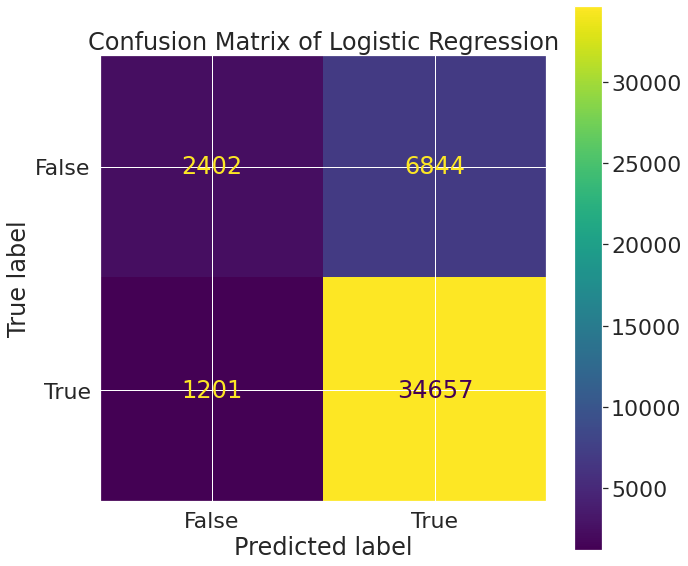

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
log_prob = logistic_regression.predict_proba(x_test)
log_pred = pd.Series([1 if x > 0.5 else 0 for x in log_prob[:,1]])
cm_logistic = confusion_matrix(y_test,log_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_logistic, display_labels = [False, True])
print("Accuracy of Logistic Model on Testing Data: \n", accuracy_score(y_test,log_pred))
print('\n')
print('True Positive Rate of Logistic Regression: \n', recall_score(y_test,log_pred))
print('\n')
print('False Positive Rate of Logistic Regression: \n', FPR(y_test,log_pred))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression")
plt.show()


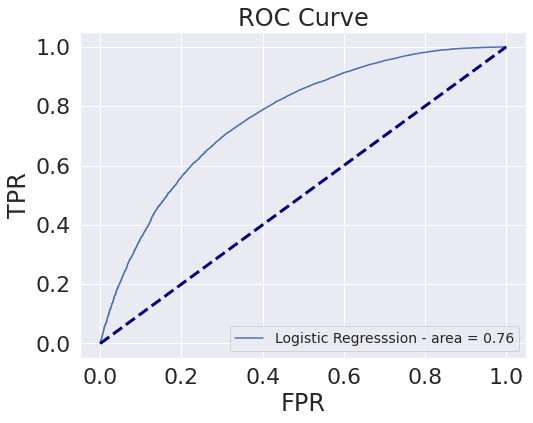

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, _ = roc_curve(y_test, log_prob[:,1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize = (8,6))
plt.title("ROC Curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,tpr,label = 'Logistic Regresssion - area = {:0.2f}'.format(roc_auc))
plt.plot([0,1],[0,1],color = 'navy',lw = 3,linestyle = '--')
plt.legend(loc = 'lower right', fontsize = 14)
plt.show()

In [ ]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label)
    output_df = pd.DataFrame(output_array)
    return output_df

In [ ]:
bs_output_dtr = bootstrap_validation(x_test,y_test,y_train,logistic_regression,
                                     metrics_list = [accuracy_score,recall_score,FPR],
                                     sample = 1000,random_state=4040)
bs_output_dtr

(1000, 3)


,0,1,2
0,0.826113,0.838773,0.320502
1,0.820193,0.833984,0.338129
2,0.819151,0.834227,0.349352
3,0.819306,0.833177,0.339784
4,0.822122,0.834468,0.323055
...,...,...,...
995,0.822078,0.835721,0.333425
996,0.821878,0.835629,0.334614
997,0.821368,0.833325,0.318335
998,0.824140,0.838249,0.338423


(array([  5.,   3.,   2.,  14.,  33.,  39.,  65.,  83., 122., 122., 121.,
        107., 102.,  79.,  37.,  34.,  22.,   6.,   3.,   1.]),
 array([0.30847458, 0.31095071, 0.31342684, 0.31590297, 0.3183791 ,
        0.32085524, 0.32333137, 0.3258075 , 0.32828363, 0.33075977,
        0.3332359 , 0.33571203, 0.33818816, 0.34066429, 0.34314043,
        0.34561656, 0.34809269, 0.35056882, 0.35304495, 0.35552109,
        0.35799722]),
 <a list of 20 Patch objects>)

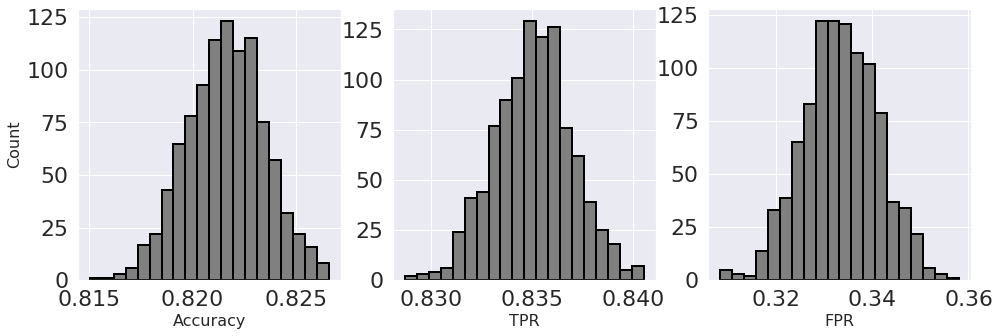

In [ ]:
fig,axs = plt.subplots(ncols = 3,figsize = (16,5))
axs[0].set_xlabel('Accuracy',fontsize = 16)
axs[1].set_xlabel('TPR',fontsize = 16)
axs[2].set_xlabel('FPR',fontsize = 16)

axs[0].set_ylabel('Count',fontsize = 16)
axs[0].hist(bs_output_dtr.iloc[:,0],bins = 20,edgecolor = 'black',linewidth = 2, color = 'gray')
axs[1].hist(bs_output_dtr.iloc[:,1],bins = 20,edgecolor = 'black',linewidth = 2, color = 'gray')
axs[2].hist(bs_output_dtr.iloc[:,2],bins = 20,edgecolor = 'black',linewidth = 2, color = 'gray')

In [ ]:
#Confidence Intervals of Accuracy, FPR and TPR
CI1 = np.quantile(bs_output_dtr.iloc[:,0],np.array([0.025,0.975]))
print("The 95-percent confidence interval of Accuracy is %s" % CI1)

CI2 = np.quantile(bs_output_dtr.iloc[:,1],np.array([0.025,0.975]))
print("The 95-percent confidence interval of TPR is %s" % CI2)

CI3 = np.quantile(bs_output_dtr.iloc[:,2],np.array([0.025,0.975]))
print("The 95-percent confidence interval of FPR is %s" % CI3)

The 95-percent confidence interval of Accuracy is [0.81786482 0.82533866]
The 95-percent confidence interval of TPR is [0.83143408 0.8389295 ]
The 95-percent confidence interval of FPR is [0.31847974 0.34896175]


# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
lda_prob = lda.predict_proba(x_test)
lda_pred = pd.Series([1 if x > 0.5 else 0 for x in lda_prob[:,1]])
cm_lda = confusion_matrix(y_test,lda_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_lda, display_labels = [False, True])
print("Accuracy of LDA Model on Testing Data: \n", accuracy_score(y_test,lda_pred))
print('\n')
print('True Positive Rate of LDA: \n', recall_score(y_test,lda_pred))
print('\n')
print('False Positive Rate of LDA: \n', cm_lda.ravel()[1]/(cm_lda.ravel()[1]+cm_lda.ravel()[0]))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of LDA")
plt.show()

# CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Exhaustive search over specified parameter values for an estimator

grid_values = {'ccp_alpha': np.linspace(0.0, 0.0001, 21),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [4040]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 

# Default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(x_train, y_train)

In [ ]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [ ]:
print('Best ccp_alpha', dtc_cv_acc.best_params_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha=0.00005,
                             criterion = 'gini',
                             random_state = 4040)
dtc = dtc.fit(x_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=x_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=10,
          max_depth = 5,
          label='root')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
dtc_prob = dtc.predict_proba(x_test)
dtc_pred = pd.Series([1 if x > 0.5 else 0 for x in dtc_prob[:,1]])
cm_dtc = confusion_matrix(y_test,dtc_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_dtc, display_labels = [False, True])
print("Accuracy of DTC Model on Testing Data: \n", accuracy_score(y_test,dtc_pred))
print('\n')
print('True Positive Rate of Decision Tree Classifier: \n', recall_score(y_test,dtc_pred))
print('\n')
print('False Positive Rate of Decision Tree Classifier: \n', cm_dtc.ravel()[1]/(cm_dtc.ravel()[1]+cm_dtc.ravel()[0]))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

# Random Forest

In [ ]:
# omit cross-validation for sake of time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
rf_prob = rf.predict_proba(x_test)
rf_pred = pd.Series([1 if x > 0.5 else 0 for x in rf_prob[:,1]])
cm_rf = confusion_matrix(y_test,rf_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = [False, True])
print("Accuracy of Random Forest Model on Testing Data: \n", accuracy_score(y_test,rf_pred))
print('\n')
print('True Positive Rate of Random Forest: \n', recall_score(y_test,rf_pred))
print('\n')
print('False Positive Rate of Random Forest: \n', cm_rf.ravel()[1]/(cm_rf.ravel()[1]+cm_rf.ravel()[0]))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of Random Forest")
plt.show()

# Boosting models

Next, we ran a boosting model like AdaBoost, XGBoost and CatBoost classifier model. In order to create a powerful learner, the boosting strategy combines a number of weak learners (predictors with low accuracy) into a strong learner (a model with strong accuracy). This works by each model learning from the mistakes of its predecessor.


## AdaBoost

Adaboost is also an ensemble learning algorithm that is created using a bunch of decision stumps (decision trees with only one split).

Accuracy : 0.8209

TPR : 0.93  

FPR : 0.6107 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100, base_estimator=dtree,learning_rate=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [ ]:
adapred = ada.predict(x_test)

adacm = pd.DataFrame(confusion_matrix(y_test,adapred))

print("Adaboost Accuracy")
(adacm[0][0]+adacm[1][1])/(adacm[0][0]+adacm[1][1]+adacm[0][1]+adacm[1][0])

Adaboost Accuracy


0.8209471443774388

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
print("Accuracy of AdaBoost Model on Testing Data: \n", accuracy_score(y_test,adapred))
print('\n')
print('True Positive Rate of AdaBoost: \n', recall_score(y_test,adapred))
print('\n')
print('False Positive Rate of AdaBoost: \n', FPR(y_test,adapred))

Accuracy of AdaBoost Model on Testing Data: 
 0.8209471443774388


True Positive Rate of AdaBoost: 
 0.9322605834123487


False Positive Rate of AdaBoost: 
 0.6107505948518278


## XG Boost

The advantage of XGBoost over the gradient boosting algorithm is that it performs parallel processing at the node level, making it more effective.

Accuracy : 0.832 

FPR : 0.7259

TPR: 0.97


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

xgb= XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier()

In [ ]:
xgbpred = xgb.predict(x_test)

xgcm = pd.DataFrame(confusion_matrix(y_test,xgbpred))

print("XGB Accuracy")
(xgcm[0][0]+xgcm[1][1])/(xgcm[0][0]+xgcm[1][1]+xgcm[0][1]+xgcm[1][0])

XGB Accuracy


0.8326755941823342

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
print("Accuracy of XGB Model on Testing Data: \n", accuracy_score(y_test,xgbpred))
print('\n')
print('True Positive Rate of XGB: \n', recall_score(y_test,xgbpred))
print('\n')
print('False Positive Rate of XGB: \n', FPR(y_test,xgbpred))

Accuracy of XGB Model on Testing Data: 
 0.8326755941823342


True Positive Rate of XGB: 
 0.9767137040548831


False Positive Rate of XGB: 
 0.7259355396928402


## Catboost

CatBoost is an algorithm for gradient boosting on decision trees. Our dataset contains numerous categorical features. The main reason to use CatBoost apart from its efficiency and performance was that it works quite well with categorical variables. 

Accuracy : 0.8475 

FPR : 0.7187

TPR : 0.9640


In [ ]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix

# 1    119698
# 0     30648
# Name: is_open, dtype: int64

# class_weight=dict({0:2.45,1:0.63})

cat= CatBoostClassifier(learning_rate=0.1)
                        # class_weights=class_weight)

cat.fit(x_train,y_train)

0:	learn: 0.6384992	total: 31.5ms	remaining: 31.4s
1:	learn: 0.5976212	total: 58.7ms	remaining: 29.3s
2:	learn: 0.5633821	total: 84.6ms	remaining: 28.1s
3:	learn: 0.5353758	total: 113ms	remaining: 28s
4:	learn: 0.5146438	total: 138ms	remaining: 27.5s
5:	learn: 0.4967944	total: 164ms	remaining: 27.2s
6:	learn: 0.4832458	total: 199ms	remaining: 28.2s
7:	learn: 0.4713396	total: 227ms	remaining: 28.1s
8:	learn: 0.4626259	total: 258ms	remaining: 28.4s
9:	learn: 0.4545370	total: 290ms	remaining: 28.7s
10:	learn: 0.4479283	total: 320ms	remaining: 28.7s
11:	learn: 0.4431214	total: 356ms	remaining: 29.3s
12:	learn: 0.4382837	total: 385ms	remaining: 29.2s
13:	learn: 0.4348881	total: 411ms	remaining: 29s
14:	learn: 0.4317211	total: 438ms	remaining: 28.8s
15:	learn: 0.4286083	total: 474ms	remaining: 29.1s
16:	learn: 0.4264455	total: 501ms	remaining: 29s
17:	learn: 0.4239497	total: 533ms	remaining: 29.1s
18:	learn: 0.4224313	total: 560ms	remaining: 28.9s
19:	learn: 0.4206522	total: 590ms	remaining:

Accuracy of CAT Boost Model on Testing Data: 
 0.8475966654842143


True Positive Rate of CAT Boost Model: 
 0.9640247643482626


False Positive Rate of CAT Boost Model: 
 0.7187973177590309




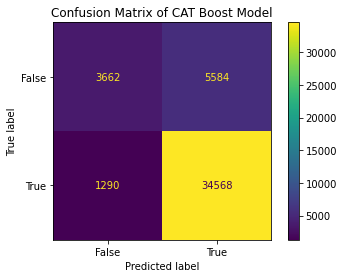

In [ ]:
catpred = cat.predict(x_test)

# catcm = pd.DataFrame(confusion_matrix(y_test,catpred))
# print("Catboost Accuracy")

# (catcm[0][0]+catcm[1][1])/(catcm[0][0]+catcm[1][1]+catcm[0][1]+catcm[1][0])

cm_catboost = confusion_matrix(y_test,catpred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_catboost, display_labels = [False, True])
print("Accuracy of CAT Boost Model on Testing Data: \n", accuracy_score(y_test,catpred))
print('\n')
print('True Positive Rate of CAT Boost Model: \n', recall_score(y_test,catpred))
print('\n')
print('False Positive Rate of CAT Boost Model: \n', cm_logistic.ravel()[1]/(cm_logistic.ravel()[1]+cm_logistic.ravel()[0]))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of CAT Boost Model")
plt.show()


## Catboost CV

Since CatBoost gave promising results we tried 10 fold cross validation on CatBoost with 5000 iterations, loss function as Logloss, learning rate of 0.1 and l2_leaf_reg of 5. The best iteration had a Logloss of 0.3653. Later, we averaged the output of all the 10 models to get the final predictions (y_pred). We achieved an improved accuracy of 0.8480, TPR of 0.9561 and reduced FPR of 0.5712.

In [ ]:
from catboost import Pool, cv

In [ ]:
cv_dataset = Pool(data=x_train,
                  label=y_train)

In [ ]:
params = {"iterations": 5000,
          # "depth": 5,
          "loss_function": "Logloss",
          "verbose": False,
          "learning_rate":0.1,  "l2_leaf_reg" : 5
          }

scores = cv(cv_dataset,
            params,
            fold_count=10, return_models=True)

Training on fold [0/10]

bestTest = 0.3638620155
bestIteration = 1253

Training on fold [1/10]

bestTest = 0.3661989732
bestIteration = 1194

Training on fold [2/10]

bestTest = 0.3610916882
bestIteration = 887

Training on fold [3/10]

bestTest = 0.3655633029
bestIteration = 909

Training on fold [4/10]

bestTest = 0.369231457
bestIteration = 1126

Training on fold [5/10]

bestTest = 0.3709658812
bestIteration = 1247

Training on fold [6/10]

bestTest = 0.3687053656
bestIteration = 1329

Training on fold [7/10]

bestTest = 0.3616627002
bestIteration = 1374

Training on fold [8/10]

bestTest = 0.3715594442
bestIteration = 1438

Training on fold [9/10]

bestTest = 0.3653236244
bestIteration = 1004



In [ ]:
import numpy as np
y_pred=[]
for i in scores[1]:
  y_pred.append(np.exp(i.predict(x_test))/(1+np.exp(i.predict(x_test))))

cat_pred = sum(y_pred)/len(y_pred)
cat_pred
# y_pred[1]

array([0.45878958, 0.75874274, 0.91251327, ..., 0.94144038, 0.39288825,
       0.91766086])

Accuracy of Catboost CV Model on Testing Data: 
 0.8480179141539553


True Positive Rate of Catboost CV classifiers: 
 0.9561325227285403


False Positive Rate of Catboost CV classifiers: 
 0.5712740644603072




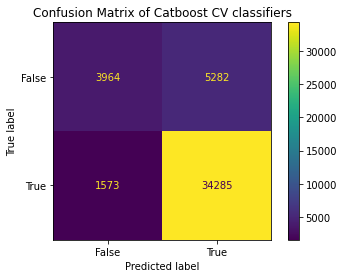

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
# self_pred = self_training_model.predict(x_test)
cat_pred = pd.Series([1 if x > 0.5 else 0 for x in cat_pred])
cm_logistic = confusion_matrix(y_test,cat_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_logistic, display_labels = [False, True])
print("Accuracy of Catboost CV Model on Testing Data: \n", accuracy_score(y_test,cat_pred))
print('\n')
print('True Positive Rate of Catboost CV classifiers: \n', recall_score(y_test,cat_pred))
print('\n')
print('False Positive Rate of Catboost CV classifiers: \n', cm_logistic.ravel()[1]/(cm_logistic.ravel()[1]+cm_logistic.ravel()[0]))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of Catboost CV classifiers")
plt.show()


# Semi supervised

We also tried semi-supervised learning, in an attempt to achieve better results and for the sake of demonstration of a new method. Semi-supervised learning refers to algorithms that attempt to make use of both labeled and unlabeled training data. 

First we used logistic regression and CatBoost model to fit on the already labeled train data. Then we created a list of -1 valued (unlabeled) for each row in the unlabeled portion of the test data which is y_test

Next, we appended the test data to the train data and made a new dataframe called x_train_semi and y_train_semi. We then used the SelfTrainingClassifier with logistic regression and the CatBoost classifier passed as the parameter base_classifier.

In each iteration, the base_classifier predicts labels for the unlabeled samples and adds a subset of these labels to the labeled dataset. 



In [ ]:
y_test_semi=y_test.copy()
y_test_semi.iloc[:]=-1
y_test_semi

14802    -1
140671   -1
40558    -1
84108    -1
117398   -1
         ..
128711   -1
108883   -1
91340    -1
83263    -1
62300    -1
Name: is_open, Length: 45104, dtype: int64

In [ ]:
x_train_semi=x_train.append(x_test)
y_train_semi=y_train.append(y_test_semi)

## Semi supervised Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
semi_lr = SelfTrainingClassifier(lr,max_iter=10,criterion="k_best",k_best=1000)
semi_lr.fit(x_train_semi,y_train_semi)

SelfTrainingClassifier(base_estimator=LogisticRegression(), criterion='k_best',
                       k_best=1000)

Accuracy of Linear regression Semi supervised Model on Testing Data: 
 0.8202598439162824


True Positive Rate of Linear regression Semi supervised Model: 
 0.9592559540409392


False Positive Rate of Linear regression Semi supervised Model: 
 0.7187973177590309




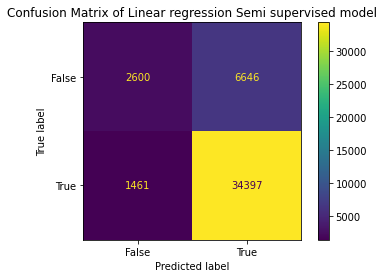

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
self_pred_lr = semi_lr.predict(x_test)
# log_pred = pd.Series([1 if x > 0.5 else 0 for x in log_prob[:,1]])
cm_logistic = confusion_matrix(y_test,self_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_logistic, display_labels = [False, True])
print("Accuracy of Logistic regression Semi supervised Model on Testing Data: \n", accuracy_score(y_test,self_pred_lr))
print('\n')
print('True Positive Rate of Logistic regression Semi supervised Model: \n', recall_score(y_test,self_pred_lr))
print('\n')
print('False Positive Rate of Logistic regression Semi supervised Model: \n', cm_logistic.ravel()[1]/(cm_logistic.ravel()[1]+cm_logistic.ravel()[0]))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of Logistic regression Semi supervised model")
plt.show()


## Semi supervised Catboost

In [ ]:
from sklearn.semi_supervised import SelfTrainingClassifier
from catboost import CatBoostClassifier
cat= CatBoostClassifier(learning_rate=0.04)
                        # class_weights=class_weight)

cat.fit(x_train,y_train)

0:	learn: 0.6703377	total: 35.1ms	remaining: 35s
1:	learn: 0.6506618	total: 63.5ms	remaining: 31.7s
2:	learn: 0.6317185	total: 89.3ms	remaining: 29.7s
3:	learn: 0.6144656	total: 117ms	remaining: 29.1s
4:	learn: 0.5993934	total: 141ms	remaining: 28.1s
5:	learn: 0.5845561	total: 167ms	remaining: 27.6s
6:	learn: 0.5723342	total: 191ms	remaining: 27.2s
7:	learn: 0.5595276	total: 218ms	remaining: 27s
8:	learn: 0.5484350	total: 246ms	remaining: 27.1s
9:	learn: 0.5377787	total: 273ms	remaining: 27.1s
10:	learn: 0.5284380	total: 303ms	remaining: 27.3s
11:	learn: 0.5202093	total: 329ms	remaining: 27.1s
12:	learn: 0.5120594	total: 371ms	remaining: 28.2s
13:	learn: 0.5052445	total: 394ms	remaining: 27.8s
14:	learn: 0.4990443	total: 422ms	remaining: 27.7s
15:	learn: 0.4933533	total: 451ms	remaining: 27.7s
16:	learn: 0.4876873	total: 482ms	remaining: 27.9s
17:	learn: 0.4827060	total: 510ms	remaining: 27.8s
18:	learn: 0.4776568	total: 540ms	remaining: 27.9s
19:	learn: 0.4730856	total: 567ms	remainin

In [ ]:
semi_cat = SelfTrainingClassifier(cat,max_iter=10,criterion="k_best",k_best=1000)
semi_cat.fit(x_train_semi,y_train_semi)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6678556	total: 29.6ms	remaining: 29.6s
1:	learn: 0.6465113	total: 60.6ms	remaining: 30.2s
2:	learn: 0.6261811	total: 86.1ms	remaining: 28.6s
3:	learn: 0.6076289	total: 116ms	remaining: 28.9s
4:	learn: 0.5910284	total: 141ms	remaining: 28s
5:	learn: 0.5751994	total: 166ms	remaining: 27.6s
6:	learn: 0.5618137	total: 196ms	remaining: 27.8s
7:	learn: 0.5484974	total: 223ms	remaining: 27.6s
8:	learn: 0.5371121	total: 258ms	remaining: 28.4s
9:	learn: 0.5256903	total: 287ms	remaining: 28.4s
10:	learn: 0.5158599	total: 313ms	remaining: 28.2s
11:	learn: 0.5070984	total: 346ms	remaining: 28.4s
12:	learn: 0.4987409	total: 378ms	remaining: 28.7s
13:	learn: 0.4913075	total: 404ms	remaining: 28.4s
14:	learn: 0.4846841	total: 434ms	remaining: 28.5s
15:	learn: 0.4782606	total: 471ms	remaining: 29s
16:	learn: 0.4728703	total: 500ms	remaining: 28.9s
17:	learn: 0.4672272	total: 528ms	remaining: 28.8s
18:	learn: 0.4622058	total: 556ms	remainin

SelfTrainingClassifier(base_estimator=<catboost.core.CatBoostClassifier object at 0x7fc54a802940>,
                       criterion='k_best', k_best=1000)

Accuracy of Catboost Semi supervised Model on Testing Data: 
 0.845956012770486


True Positive Rate of Catboost Semi supervised Model: 
 0.968570472418986


False Positive Rate of Catboost Semi supervised Model: 
 0.6295695435864157




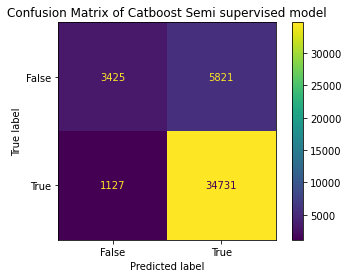

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
self_pred_cat = semi_cat.predict(x_test)
# log_pred = pd.Series([1 if x > 0.5 else 0 for x in log_prob[:,1]])
cm_logistic = confusion_matrix(y_test,self_pred_cat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_logistic, display_labels = [False, True])
print("Accuracy of Catboost Semi supervised Model on Testing Data: \n", accuracy_score(y_test,self_pred_cat))
print('\n')
print('True Positive Rate of Catboost Semi supervised Model: \n', recall_score(y_test,self_pred_cat))
print('\n')
print('False Positive Rate of Catboost Semi supervised Model: \n', cm_logistic.ravel()[1]/(cm_logistic.ravel()[1]+cm_logistic.ravel()[0]))
print('\n')
cm_display.plot()
plt.title("Confusion Matrix of Catboost Semi supervised model")
plt.show()


# Neural Net - ANN

In [ ]:
yelp6.head(2)

,stars,review_count,is_open,cluster_label,alcohol,ambience,bikeparking,businessacceptsbitcoin,businessacceptscreditcards,businessparking,...,thursday_total,friday_start,friday_end,friday_total,saturday_start,saturday_end,saturday_total,sunday_start,sunday_end,sunday_total
0,5.0,7,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,15,1,0,0,0,0,0,1,0,...,10.5,8.0,18.5,10.5,8.0,14.0,6.0,0.0,0.0,0.0


In [ ]:
#Standard Scaling the variables
yelp7 = yelp6.drop(columns=['is_open'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for var in yelp7.columns:
    yelp7[var] = yelp6[var].astype('float64')
    yelp7[var] = scaler.fit_transform(yelp6[var].values.reshape(-1, 1))

In [ ]:
yelp7.shape

(150346, 88)

In [ ]:
yelp7.head()

,stars,review_count,cluster_label,alcohol,ambience,bikeparking,businessacceptsbitcoin,businessacceptscreditcards,businessparking,byappointmentonly,...,thursday_total,friday_start,friday_end,friday_total,saturday_start,saturday_end,saturday_total,sunday_start,sunday_end,sunday_total
0,1.440118,-0.312637,-0.488837,-0.634858,-0.646113,-0.966828,-0.362126,-1.978970,-1.239764,1.597187,...,-1.603746,-1.657448,-1.558416,-1.584548,-1.360899,-1.248597,-1.252438,-0.933207,-0.895148,-0.867503
1,-0.612390,-0.246587,-1.396179,-0.634858,-0.646113,-0.966828,-0.362126,0.505313,-1.239764,-0.626101,...,0.549658,0.095402,0.548529,0.527495,0.243544,0.246223,-0.128149,-0.933207,-0.895148,-0.867503
2,-0.099263,-0.188793,-0.488837,-0.634858,-0.646113,1.034310,-0.362126,0.505313,0.806605,1.597187,...,1.267459,0.095402,1.061030,1.432656,0.243544,1.207178,1.558285,0.545048,1.390061,1.754501
3,0.413864,0.290072,0.418505,1.575156,-0.646113,1.034310,-0.362126,0.505313,0.806605,1.597187,...,1.062373,-0.123704,0.833252,1.231509,0.042989,0.993632,1.370903,0.360266,1.286188,1.754501
4,0.926991,-0.263100,0.418505,-0.634858,-0.646113,1.034310,-0.362126,0.505313,0.806605,-0.626101,...,-0.373229,0.971826,0.947141,0.426922,1.045766,1.100405,0.621377,1.284176,0.974569,0.256213


In [ ]:
#Splitting into train and test
yelp7['is_open'] = yelp6['is_open']
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(yelp7,test_size=0.3,random_state = 4040)

In [ ]:
x_train = df_train.drop(columns=['is_open'])
y_train = df_train['is_open']
x_test = df_test.drop(columns=['is_open'])
y_test = df_test['is_open']

In [ ]:
#pip install tensorflow

In [ ]:
#Downloading the required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
yelp7.shape

(150346, 89)

In [ ]:
#Building the ANN
from numpy.random import seed
seed(0)
ann = Sequential()
ann.add(Dense(40,input_shape=(88,),activation='relu'))
ann.add(Dense(20,activation='relu'))
ann.add(Dense(20,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [ ]:
yelp6.shape

(150346, 89)

In [ ]:
#Compling and Fiitng the model
ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=7,batch_size=32)

Epoch 1/7
3289/3289 [==============================] - 7s 2ms/step - loss: 0.4088 - accuracy: 0.8299
Epoch 2/7
3289/3289 [==============================] - 7s 2ms/step - loss: 0.3912 - accuracy: 0.8386
Epoch 3/7
3289/3289 [==============================] - 7s 2ms/step - loss: 0.3847 - accuracy: 0.8407
Epoch 4/7
3289/3289 [==============================] - 7s 2ms/step - loss: 0.3814 - accuracy: 0.8419
Epoch 5/7
3289/3289 [==============================] - 6s 2ms/step - loss: 0.3777 - accuracy: 0.8439
Epoch 6/7
3289/3289 [==============================] - 6s 2ms/step - loss: 0.3757 - accuracy: 0.8446
Epoch 7/7
3289/3289 [==============================] - 6s 2ms/step - loss: 0.3735 - accuracy: 0.8456


In [ ]:
#Checking the accuracy using y_test
import numpy as np
from sklearn.metrics import accuracy_score
ann_pred = np.where(ann.predict(x_test)>0.5,1,0)
accuracy_score(y_test,ann_pred)

1410/1410 [==============================] - 2s 1ms/step


0.8409675416814473